         posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  
0                          Paper Bag Victoria Secret    249114794  
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045  
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891  
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188  
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069  
Total postings: 34250
Unique products (label_group): 11014


Text(0.5, 1.0, 'Distribution of Label Group Sizes')

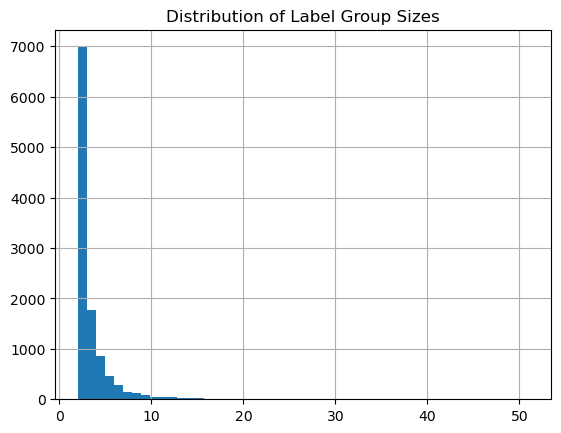

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os

#Load metadata

data_dir = r'C:\Users\Matthew\Documents\PhD\shopee-product-matching\data\train.csv'

df = pd.read_csv(data_dir)
print(df.head())

#Dataset size
print(f"Total postings: {len(df)}")
print(f"Unique products (label_group): {df['label_group'].nunique()}")

# Label distribution
df['label_group'].value_counts().hist(bins=50)
plt.title('Distribution of Label Group Sizes')
plt.ylabel